# House prices

#### Objective:
- Predict sale prices of houses from descriptive data of them

#### Model:
- Extreme gradient boosting

## Installation and importation of necessary packages

In [69]:
! pip install hyperopt

In [70]:
# Packages needed
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from hyperopt import hp, tpe, fmin
import matplotlib.pyplot as plt

## Lecture of the dataset and preprocessing

In [71]:
#path to dataset
#CHANGE AS NEEDED
df=pd.read_csv (r'C:\Users\phili\Documents\Machine Learning\Kaggle\House Prices\train.csv')

- Size and first lines of the dataframe:

In [72]:
print("Size of the dataset :",df.shape)
df.head()

Size of the dataset : (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- The two first columns look similar, check and delete one. Verify if some features are in double

In [73]:
if np.array_equal(df.index.tolist(),np.array(df["Id"].tolist())-1):
    del df["Id"]

- Some statistics of the dataframe

In [74]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- Types of features and change int to floats

In [75]:
print("Number of continuous features : " , df.dtypes.astype(str).value_counts()[2],", of int features : " , df.dtypes.astype(str).value_counts()[1],", of categorical features : " , df.dtypes.astype(str).value_counts()[0] , "\n")

Number of continuous features :  3 , of int features :  34 , of categorical features :  43 



- Check is the categorical features look badly filled

In [76]:
for x in df.columns:
    if(df[x].dtype==np.object):
        print("Values of feature", x, ":",df[x].unique())

Values of feature MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Values of feature Street : ['Pave' 'Grvl']
Values of feature Alley : [nan 'Grvl' 'Pave']
Values of feature LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
Values of feature LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Values of feature Utilities : ['AllPub' 'NoSeWa']
Values of feature LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Values of feature LandSlope : ['Gtl' 'Mod' 'Sev']
Values of feature Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Values of feature Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Values of feature Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Values of feature BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Values of feature Hous

## Data visualisation

- Lets look at the correlation matrix between non categorical features

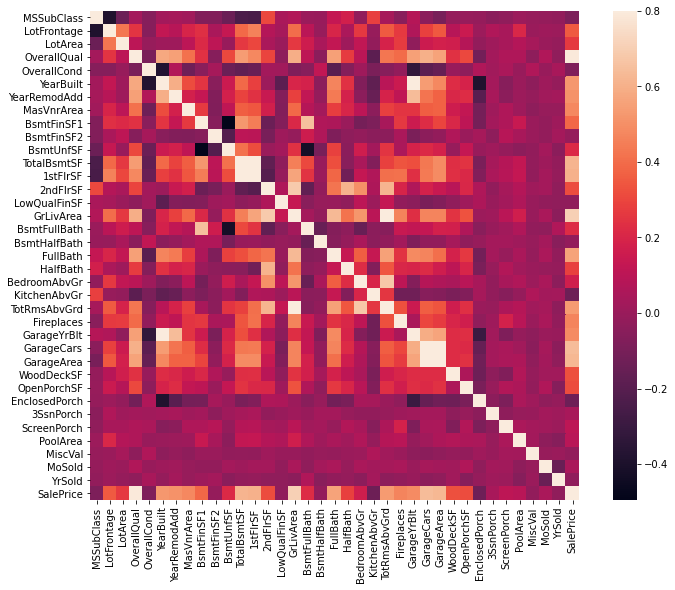

In [77]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

- Lets focus on features which are most correlated to SalePrice

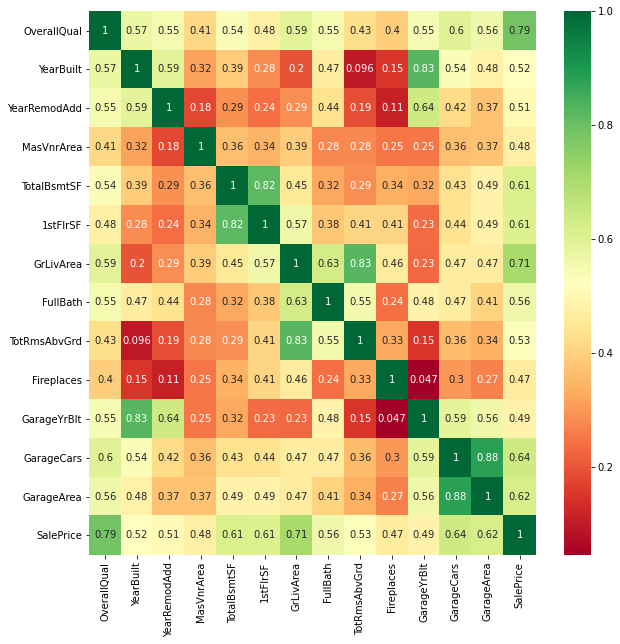

In [78]:
corr = df.corr()
highest_corr_features = corr.index[abs(corr["SalePrice"])>0.4]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[highest_corr_features].corr(),annot=True,cmap="RdYlGn")

- We can look at the pair grid of features which are highly correlated to Sale Price

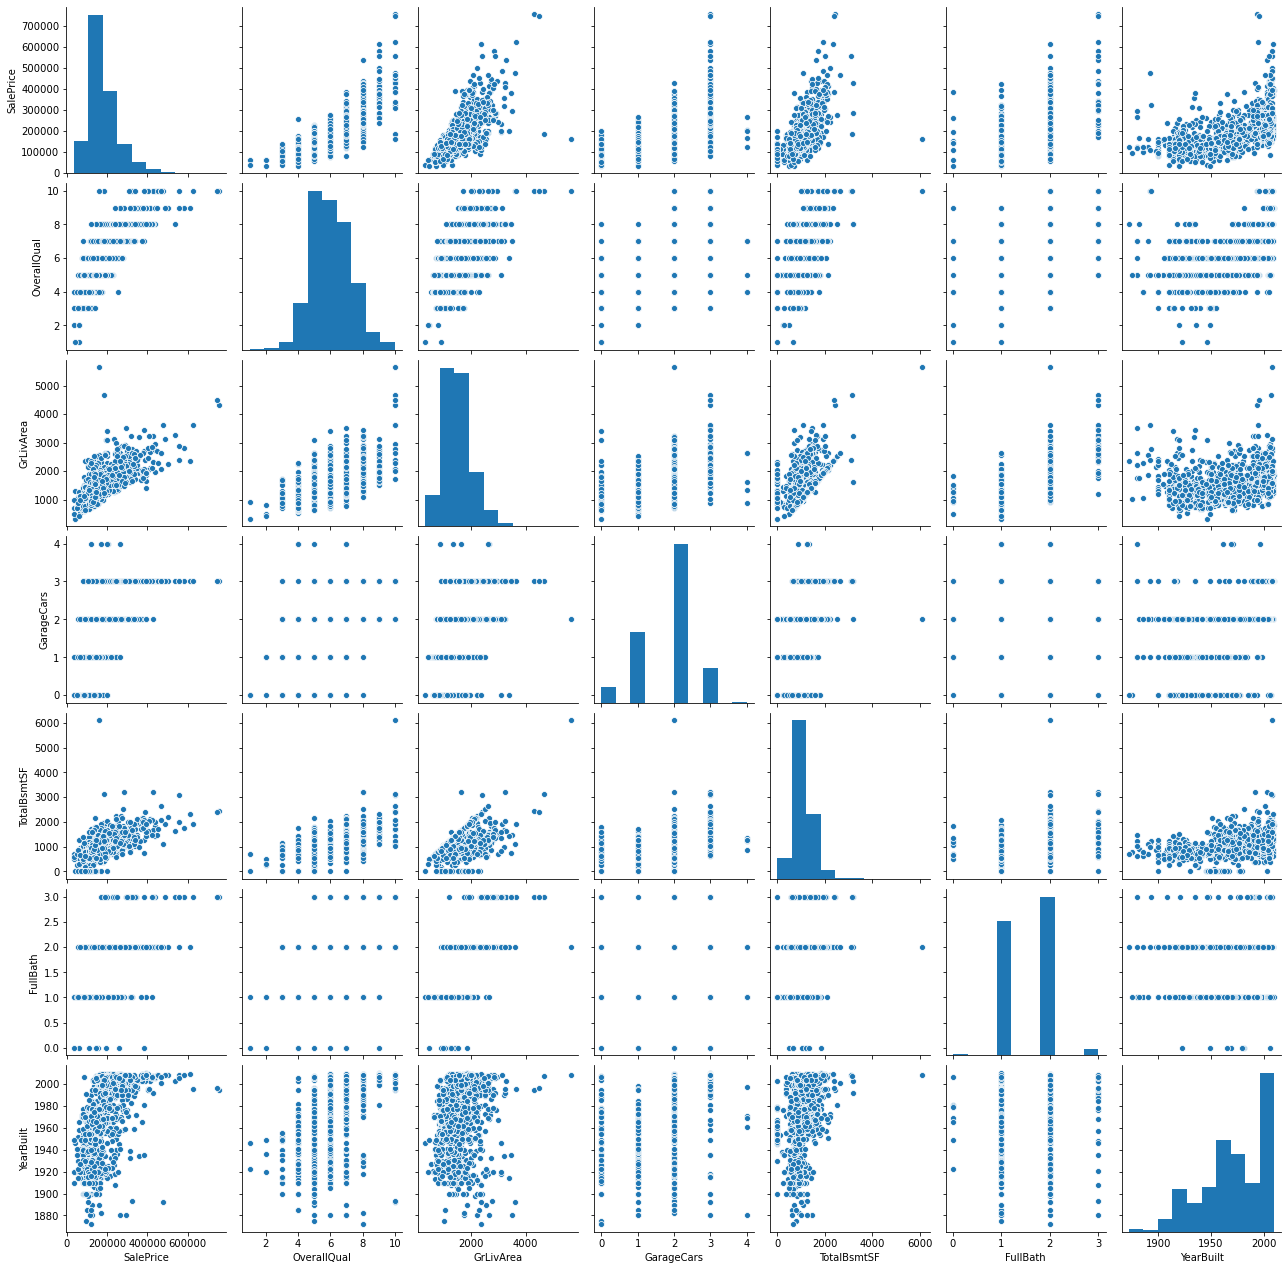

In [79]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols])

- Distribution histogram of SalePrice

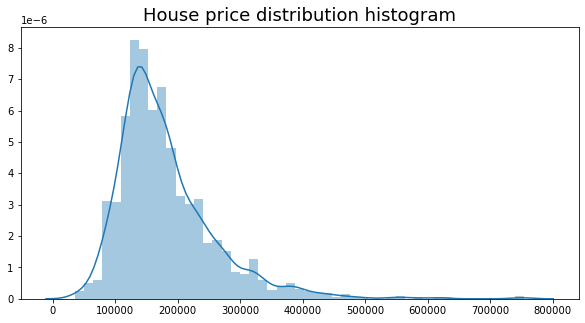

In [80]:
# Separate X and y
y=df["SalePrice"].values
df=df.loc[:, df.columns != "SalePrice"]

plt.figure(figsize=(10, 5))
sns.distplot(y).set(ylabel=None, xlabel=None)
plt.title('House price distribution histogram', fontsize=18)
plt.show()

- Log transform of the target feature to obtain a normally distributed variable

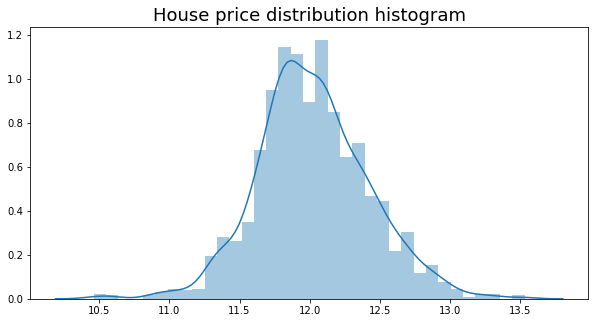

In [81]:
y=np.log1p(y)
plt.figure(figsize=(10, 5))
sns.distplot(y).set(ylabel=None, xlabel=None)
plt.title('House price distribution histogram', fontsize=18)
plt.show()

## Feature engineering

- Creation of two new features: the total surface and the total number of bathrooms

In [82]:
df["TotalSF"]=df["GrLivArea"]+df["TotalBsmtSF"]
df["TotalBaths"]=df["FullBath"]+df["BsmtFullBath"]+0.5*df["HalfBath"]+0.5*df["BsmtHalfBath"]
df['wholeExterior'] = df['Exterior1st']+df['Exterior2nd']

- New binary feature remodeling or not

In [83]:
newcol=[]
for i in range(len(df["YearRemodAdd"])):
    if df["YearRemodAdd"][i]!=df["YearRemodAdd"][i] or df["YearBuilt"][i]!=df["YearBuilt"][i]:
        newcol.append(np.nan)
    else:
        if df["YearRemodAdd"][i]==df["YearBuilt"][i]:
            newcol.append(0)
        else:
            newcol.append(1)
df["Remodornot"]=newcol

- Change the types of some numerical features that should be categorical (nominal)

In [84]:
df["MSSubClass"] = df["MSSubClass"].astype(str)
df["YrSold"] = df["YrSold"].astype(str)
df["MoSold"] = df["MoSold"].astype(str)

## Label encoding for the ordinal categorical features (based on the data description)

In [85]:
def labelenc(col,label):
    dicLabel={}
    for i in range(len(label)):
        dicLabel[label[i]]=i
    newcol=[]
    for i in range(len(col)):
        if col[i]!=col[i]:
            newcol.append(np.nan)
        else:
            newcol.append(dicLabel[col[i]])
    return newcol

In [86]:
dictLabelEncoding={
    "LotShape": ["IR3","IR2","IR1","Reg"],
    "Utilities": ["ELO","NoSeWa","NoSewr","AllPub"],
    "LandSlope": ["Sev","Mod","Gtl"],
    "ExterQual": ["Po","Fa","TA","Gd","Ex"],
    "ExterCond": ["Po","Fa","TA","Gd","Ex"],
    "BsmtQual": ["NA","Po","Fa","TA","Gd","Ex"],
    "BsmtCond": ["NA","Po","Fa","TA","Gd","Ex"],
    "BsmtExposure": ["NA","No","Mn","Av","Gd"],
    "BsmtFinType1": ["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],
    "BsmtFinType2": ["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],
    "HeatingQC": ["Po","Fa","TA","Gd","Ex"],
    "KitchenQual": ["Po","Fa","TA","Gd","Ex"],
    "Functional": ["Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"],
    "FireplaceQu": ["NA","Po","Fa","TA","Gd","Ex"],
    "GarageFinish": ["NA","Unf","RFn","Fin"],
    "GarageQual": ["NA","Po","Fa","TA","Gd","Ex"],
    "GarageCond": ["NA","Po","Fa","TA","Gd","Ex"],
    "PavedDrive": ["N","P","Y"],
    "CentralAir": ["N","Y"],
}

for x in dictLabelEncoding.keys():
    df[x]=labelenc(df[x].values,dictLabelEncoding[x])

for x in df.columns:
    if(df[x].dtype==np.int64):
        df[x]=df[x].astype(float)

## Missing values

In [87]:
print("Number of lines where at least one value is missing", sum([True for idx,row in df.iterrows() if any(row.isnull())]))
print("Which is",sum([True for idx,row in df.iterrows() if any(row.isnull())])/len(df)*100," % of the dataset.")
df.isnull().sum().sort_values(ascending = False).head(20)

Number of lines where at least one value is missing 1460
Which is 100.0  % of the dataset.


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
BldgType           0
dtype: int64

- Delete features with too much missing values

In [88]:
del df["Fence"]
del df["Alley"]
del df["MiscFeature"]
del df["PoolQC"]

- Fill missing values in FireplaceQu using Fireplaces

In [89]:
for i in range(len(df["FireplaceQu"])):
    if df["Fireplaces"][i]==0:
        df["FireplaceQu"][i]=0

- Create new value Unknown for missing values in the categorical features and put 0 where values are missing for cont and int features

In [90]:
for x in df.columns:
    if(df[x].dtype==np.object):
        df[x] = np.where(df[x].isnull(),"Unknown",df[x])

df=df.replace(np.nan,0)

## Train/test sets

- Split the dataset into a train set and a test set

In [91]:
# Split train and test
X=df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Shapes of the train and test sets :",X_train.shape,X_test.shape)

Shapes of the train and test sets : (1168, 79) (292, 79)


- Mean normalisation

In [92]:
# Mean normalisation for continuous features
dictMeanStd={}
for x in X_train.columns:
    if (X_train[x].dtype==np.float64):
        dictMeanStd[x]=[X_train[x].mean(),X_train[x].std()]
        X_train[x]=(X_train[x]-dictMeanStd[x][0])/dictMeanStd[x][1]
        X_test[x]=(X_test[x]-dictMeanStd[x][0])/dictMeanStd[x][1]

- Detection of outliers and suppression of them

In [93]:
# Be careful to suppress also values in y_train
threshold=7
X_train['SalePrice']=y_train
X_train['outliers']=0
for x in X_train.columns:
    if(X_train[x].dtype!=np.object and x!='outliers' and x!='SalePrice'):
        X_train.loc[(X_train[x]-X_train[x].mean()).abs() > threshold*X_train[x].std(),'outliers'] = 1

print("The number of outliers is:",sum(X_train['outliers']))
X_train=X_train[X_train.outliers==0].reset_index(drop=True)
y_train=X_train['SalePrice'].values
del X_train["SalePrice"]
del X_train["outliers"]

The number of outliers is: 42


- One hot encoding on categorical features

In [94]:
# Separate cat and float features to do a onehotencoding on cat features
X_traintemp=X_train.select_dtypes('object')
enc=OneHotEncoder(handle_unknown = 'ignore')
enc.fit(X_traintemp)
X_traintemp=enc.transform(X_traintemp).toarray()
X_train=np.concatenate([X_traintemp,X_train.select_dtypes('float64').values],axis=1)
X_testtemp=X_test.select_dtypes('object')
X_testtemp=enc.transform(X_testtemp).toarray()
X_test=np.concatenate([X_testtemp,X_test.select_dtypes('float64').values],axis=1)
print(X_train.shape,X_test.shape)

(1126, 300) (292, 300)


### Model and cross-validation for hyper-parameters

- Model XGBRegressor

In [95]:
space = {'n_estimators':hp.quniform('n_estimators', 1000, 4000, 100),
         'gamma':hp.uniform('gamma', 0.01, 0.05),
         'learning_rate':hp.uniform('learning_rate', 0.00001, 0.025),
         'max_depth':hp.quniform('max_depth', 3,7,1),
         'subsample':hp.uniform('subsample', 0.60, 0.95),
         'colsample_bytree':hp.uniform('colsample_bytree', 0.60, 0.98),
         'colsample_bylevel':hp.uniform('colsample_bylevel', 0.60, 0.98),
         'reg_lambda': hp.uniform('reg_lambda', 1, 20)
        }

def objective(params):
    params = {'n_estimators': int(params['n_estimators']),
             'gamma': params['gamma'],
             'learning_rate': params['learning_rate'],
             'max_depth': int(params['max_depth']),
             'subsample': params['subsample'],
             'colsample_bytree': params['colsample_bytree'],
             'colsample_bylevel': params['colsample_bylevel'],
             'reg_lambda': params['reg_lambda']}
    
    xb_a= xgb.XGBRegressor(**params)
    score = cross_val_score(xb_a, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1).mean()
    return -score

best = fmin(fn= objective, space= space, max_evals=20, rstate=np.random.RandomState(1), algo=tpe.suggest)

regressor = xgb.XGBRegressor(random_state=0,
                        n_estimators=int(best['n_estimators']), 
                        colsample_bytree= best['colsample_bytree'],
                        gamma= best['gamma'],
                        learning_rate= best['learning_rate'],
                        max_depth= int(best['max_depth']),
                        subsample= best['subsample'],
                        colsample_bylevel= best['colsample_bylevel'],
                        reg_lambda= best['reg_lambda']
                       )

100%|██████████| 20/20 [14:41<00:00, 44.09s/trial, best loss: 0.013735858128517953]


- Fitting the model

In [96]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.7340926186746373, colsample_bynode=1,
             colsample_bytree=0.8610067734711998, gamma=0.03759070584479937,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.011204330828801307, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3300, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1.2555319596734726, scale_pos_weight=1,
             subsample=0.8906396542725507, tree_method='exact',
             validate_parameters=1, verbosity=None)

- Prediction and evaluation of the model on the train and test sets

In [97]:
y_train_pred=regressor.predict(X_train)
print("RMSLE on the train:", np.sqrt(metrics.mean_squared_log_error(y_train_pred,y_train)))
y_pred=regressor.predict(X_test)
print("RMSLE on the test:", np.sqrt(metrics.mean_squared_log_error(y_pred,y_test)))

RMSLE on the train: 0.0047410650730674575
RMSLE on the test: 0.009570374941187516


# Submission part

In [98]:
# Import submission
#CHANGE AS NEEDED
sub=pd.read_csv (r'C:\Users\phili\Documents\Machine Learning\Kaggle\House Prices\test.csv')
del sub["Id"]

- Preprocess of the test set

In [99]:
# Feature engineering
sub['TotalSF'] = sub['GrLivArea']+sub['TotalBsmtSF']
sub['TotalBaths'] = sub['FullBath']+sub["BsmtFullBath"]+.5*sub['HalfBath']+.5*sub['BsmtHalfBath']
sub['wholeExterior'] = sub['Exterior1st']+sub['Exterior2nd']

newcol=[]
for i in range(len(sub["YearRemodAdd"])):
    if sub["YearRemodAdd"][i]!=sub["YearRemodAdd"][i] or sub["YearBuilt"][i]!=sub["YearBuilt"][i]:
        newcol.append(np.nan)
    else:
        if sub["YearRemodAdd"][i]==sub["YearBuilt"][i]:
            newcol.append(0)
        else:
            newcol.append(1)
sub["Remodornot"]=newcol

# Change the type of features MSSubClass, YrSold and MoSold
sub["MSSubClass"] = sub["MSSubClass"].astype(str)
sub["YrSold"] = sub["YrSold"].astype(str)
sub["MoSold"] = sub["MoSold"].astype(str)

# Label encoding
for x in dictLabelEncoding.keys():
    sub[x]=labelenc(sub[x].values,dictLabelEncoding[x])

# Change the int features to continuous features
for x in df.columns:
    if(sub[x].dtype==np.int64):
        sub[x]=sub[x].astype(float)

# Missing Values
del sub["Fence"]
del sub["Alley"]
del sub["MiscFeature"]
del sub["PoolQC"]
for i in range(len(sub["FireplaceQu"])):
    if sub["Fireplaces"][i]==0:
        sub["FireplaceQu"][i]="0"
for x in sub.columns:
    if(sub[x].dtype==np.object):
        sub[x] = np.where(sub[x].isnull(),"Unknown",sub[x])
sub=sub.replace(np.nan,0)

# Mean normalization
for x in sub.columns:
    if (sub[x].dtype==np.float64):
        sub[x]=(sub[x]-dictMeanStd[x][0])/dictMeanStd[x][1]

# One hot encoding
subtemp=sub.select_dtypes('object')
subtemp=enc.transform(subtemp).toarray()
sub=np.concatenate([subtemp,sub.select_dtypes('float64').values],axis=1)

- Prediction and exportation of the submission file

In [100]:
# Predict
y_submission_pred=regressor.predict(sub)

# Export
#CHANGE AS NEEDED
export=pd.read_csv (r'C:\Users\phili\Documents\Machine Learning\Kaggle\House Prices\test.csv')
export=pd.DataFrame(export["Id"])
y_submission_pred=(np.expm1(y_submission_pred))
export["SalePrice"]=y_submission_pred
#CHANGE AS NEEDED
export.to_csv (r'C:\Users\phili\Documents\Machine Learning\Kaggle\House Prices\export_sub.csv', index = False, header=True)